### Drawdowns

In [109]:
import pandas as pd 
rets = pd.read_csv('data\Portfolios_Formed_on_ME_monthly_EW.csv', header = 0, index_col = 0, parse_dates = True, na_values = -99.99)

In [110]:
rets.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [111]:
columns = ['Lo 10', 'Hi 10']
rets = rets[columns] / 100
rets.columns = ['Small Cap', 'Large Cap']

In [112]:
rets.head()

,Small Cap,Large Cap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [113]:
rets.index = pd.to_datetime(rets.index, format = '%Y%m')
rets.head()

,Small Cap,Large Cap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [114]:
rets.index = rets.index.to_period('M')
rets.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

### Computing Drawdown 
1. Creating a Cumulative Wealth Index
2. Computing the Previous Peaks
3. Computing Drawdown = Wealth Index - Previous Peak

In [115]:
def drawdown(return_series: pd.Series):
    wealth_index = 1000 * (1 + return_series).cumprod()
    prev_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - prev_peaks)/prev_peaks
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks": prev_peaks,
        "Drawdown": drawdowns
    })


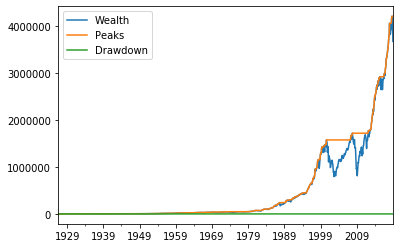

In [116]:
drawdown(rets['Large Cap']).plot()

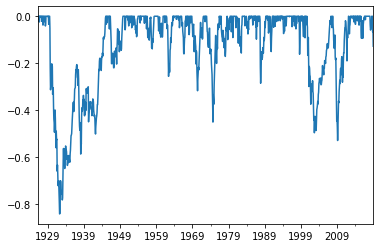

In [117]:
drawdown(rets['Large Cap'])['Drawdown'].plot()

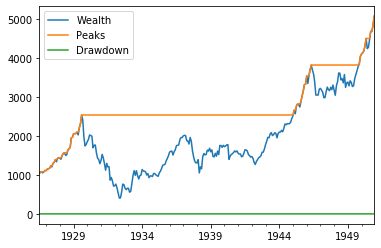

In [119]:
drawdown(rets['Large Cap'])[:'1950'].plot()

In [120]:
drawdown(rets['Large Cap']).head()

,Wealth,Peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [125]:
drawdown(rets['Large Cap'])['Drawdown'].min()

-0.8400375277943123

In [126]:
drawdown(rets['Small Cap'])['Drawdown'].min()

-0.8330007793945303

In [131]:
drawdown(rets['Small Cap'])['Drawdown'].idxmin()

Period('1932-05', 'M')

In [134]:
drawdown(rets['Small Cap'])['1940':]['Drawdown'].min()


-0.7000596091967913

In [137]:
drawdown(rets['Large Cap'])['1940':]['Drawdown'].min()


-0.5280945042309304